# HAR example

Human Activity Recognition (HAR) example, using a modified version of the MotionSense dataset.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


Loading the dataset, already splited in train, validation and test

In [2]:
train = pd.read_csv('MotionSense/train.csv') 
validation = pd.read_csv('MotionSense/validation.csv')
test = pd.read_csv('MotionSense/test.csv') 

Concatenating train and validation

In [3]:
train = pd.concat([train, validation], ignore_index = True)

Creating arrays of each accelerometer and gyroscope axis 

In [4]:
accel_x = []
accel_y = []
accel_z = []
gyro_x = []
gyro_y = []
gyro_z = []

for i in range(60):
    accel_x.append("accel-x-{}".format(i)) 
    accel_y.append("accel-y-{}".format(i))
    accel_z.append("accel-z-{}".format(i))
    gyro_x.append("gyro-x-{}".format(i)) 
    gyro_y.append("gyro-y-{}".format(i))
    gyro_z.append("gyro-z-{}".format(i))

In [5]:
sample = 0

accel_x_data = train.loc[sample,accel_x]
accel_y_data = train.loc[sample,accel_y]
accel_z_data = train.loc[sample,accel_z]
gyro_x_data = train.loc[sample,gyro_x]
gyro_y_data = train.loc[sample,gyro_y]
gyro_z_data = train.loc[sample,gyro_z]

Ploting each accelerometer and gyroscope axis 

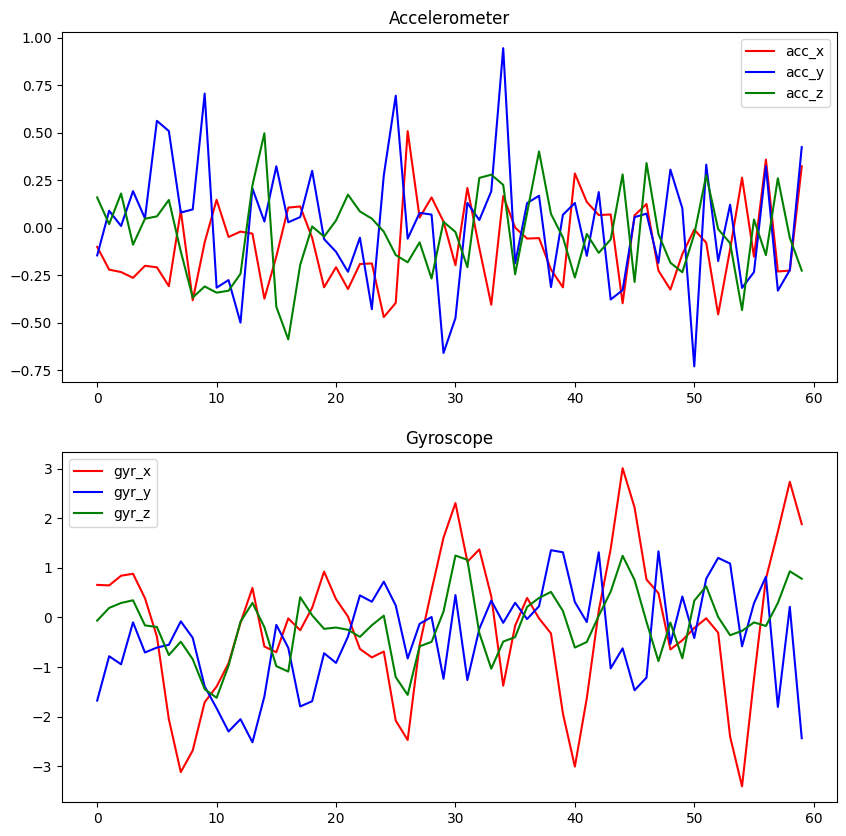

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax = axes[0]
ax.plot(range(60), accel_x_data, color='r', label="acc_x")
ax.plot(range(60), accel_y_data, color='b', label="acc_y")
ax.plot(range(60), accel_z_data, color='g', label="acc_z")
ax.set_title("Accelerometer")
ax.legend()  

ax = axes[1]
ax.plot(range(60), gyro_x_data , color='r', label="gyr_x")
ax.plot(range(60), gyro_y_data, color='b', label="gyr_y")
ax.plot(range(60), gyro_z_data, color='g', label="gyr_z")
ax.set_title("Gyroscope")
ax.legend()
       
plt.show()

Setting the features matrix and the target vector, for train and test

In [7]:
X_train = train.iloc[:,0:360].to_numpy()
y_train = train.loc[:,'activity code'].to_numpy()
X_test = test.iloc[:,0:360].to_numpy()
y_test = test.loc[:,'activity code'].to_numpy()

Applying the Random Forest Classifier

In [8]:
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)
y_predict_rf = clf_rf.predict(X_test)

Calculating Accuracy and F1-score

In [13]:
acc_rf = accuracy_score(y_test, y_predict_rf)
f1_score_rf = f1_score(y_test, y_predict_rf, average='weighted')
print('Random Forest')
print('Accuracy = {}'.format(acc_rf))
print('F1-Score = {}'.format(f1_score_rf))




Random Forest
Accuracy = 0.8303921568627451
F1-Score = 0.8313731520895119


Applying the Support Vector Machine Classifier

In [18]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
y_predict_svc = clf_svc.predict(X_test)

In [19]:
acc_svc = accuracy_score(y_test, y_predict_svc)
f1_score_svc = f1_score(y_test, y_predict_svc, average='weighted')
print('Support Vector Machine')
print('Accuracy = {}'.format(acc_svc))
print('F1-Score = {}'.format(f1_score_svc))

Support Vector Machine
Accuracy = 0.5607843137254902
F1-Score = 0.5365497958259012
